In [27]:
import anndata

adata = anndata.read_h5ad("../../data/scib_data/original/human_pancreas_norm_complexBatch.h5ad")

In [28]:
cell_types = adata.obs["celltype"].unique().tolist()

In [29]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

embeddings = model.encode(cell_types)

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


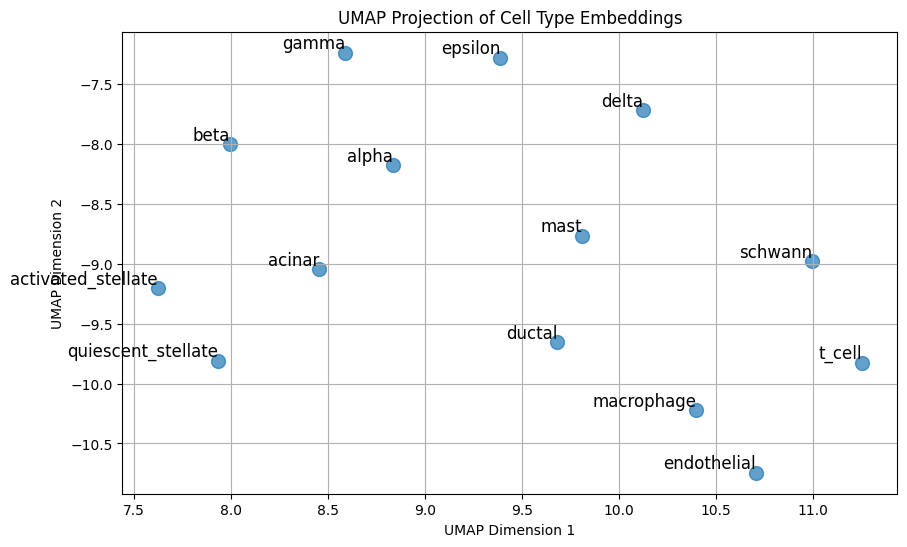

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import umap

# Define UMAP parameters and fit-transform the embeddings
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric="cosine", random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Plot UMAP visualization
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=100, alpha=0.7)

# Add labels
for i, label in enumerate(cell_types):
    plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], label, fontsize=12, ha="right", va="bottom")

plt.title("UMAP Projection of Cell Type Embeddings")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt


def plot_similarity_distribution(similarity_matrix: np.ndarray):
    """
    Plot the distribution of pairwise cosine similarities.

    Parameters
    ----------
    similarity_matrix : np.ndarray
        A 2D numpy array of pairwise cosine similarities.

    Returns
    -------
    None
    """
    # Extract upper triangle of similarity matrix excluding the diagonal
    similarities = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

    plt.figure(figsize=(8, 5))
    plt.hist(similarities, bins=30, edgecolor="black", alpha=0.7)
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Frequency")
    plt.title("Distribution of Pairwise Cosine Similarities")
    plt.grid(True)
    plt.show()

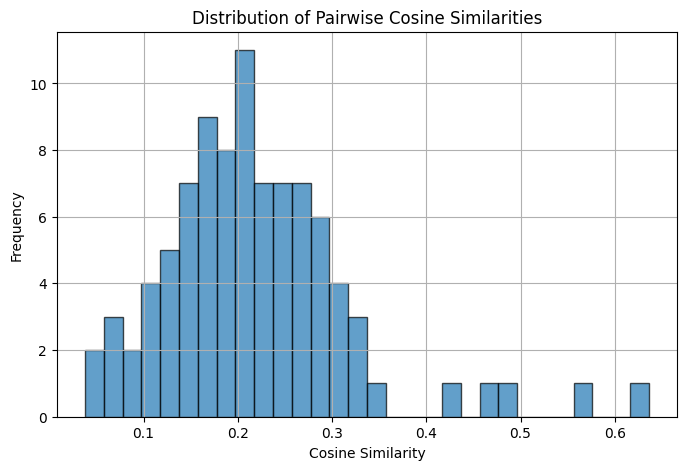

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(embeddings, embeddings)
plot_similarity_distribution(similarities)

In [21]:
cell_types.append("mouse")
cell_types.append("human")
cell_types.append("car")
cell_types.append("house")
cell_types.append("doctor")

In [22]:
embeddings = model.encode(cell_types)

/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/mengerj/repos/mmcontext/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


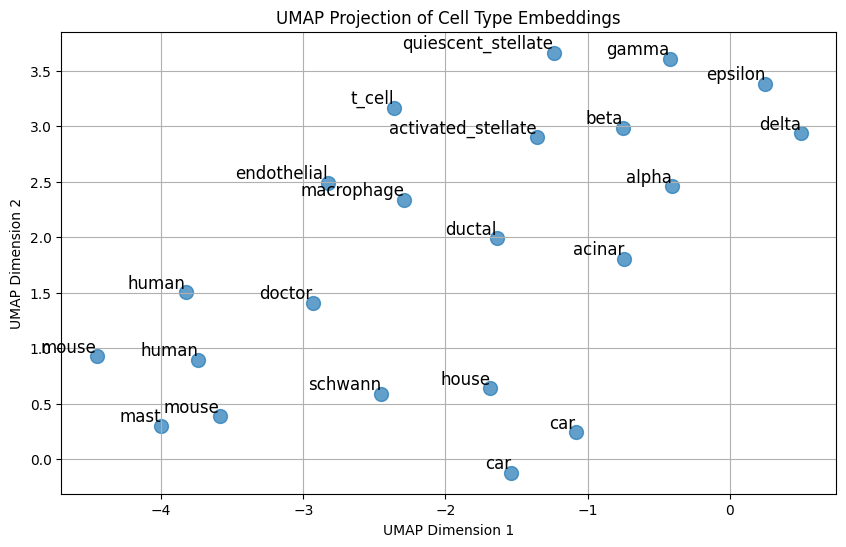

In [23]:
import matplotlib.pyplot as plt
import umap

# Define UMAP parameters and fit-transform the embeddings
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric="cosine", random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Plot UMAP visualization
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=100, alpha=0.7)

# Add labels
for i, label in enumerate(cell_types):
    plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], label, fontsize=12, ha="right", va="bottom")

plt.title("UMAP Projection of Cell Type Embeddings")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(embeddings)

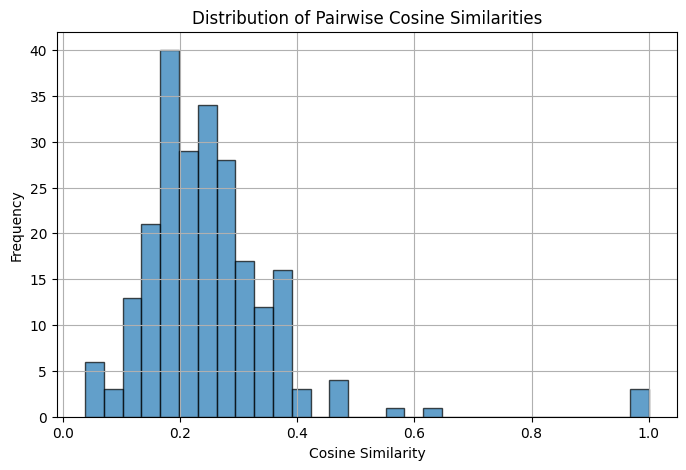

In [26]:
plot_similarity_distribution(similarities)